In [1]:
import json
import torch
from sentence_transformers import SentenceTransformer, util
from datasets import Dataset
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import seaborn as sns

In [2]:
vectorizer = TfidfVectorizer()

In [3]:
# Assume the data set is in the below subfolder
inputDataPrefix = "C:/Users/Peridot/Desktop/Facultate/Master ANUL II/Sem I/NLP2/MOROCO/preprocessed/"

In [4]:
def loadMOROCODataSamples(subsetName):
# Copyright for function (C) 2018  Andrei M. Butnaru, Radu Tudor Ionescu
    inputSamplesFilePath = (inputDataPrefix + "%s/samples.txt") % (subsetName)
    inputDialectLabelsFilePath = (inputDataPrefix + "%s/dialect_labels.txt") % (subsetName)
    inputCategoryLabelsFilePath = (inputDataPrefix + "%s/category_labels.txt") % (subsetName)
    
    IDs = []
    samples = []
    dialectLabels = []
    categoryLabels = []
    
    # Loading the data samples
    inputSamplesFile = open(inputSamplesFilePath, 'r', encoding="utf8")
    sampleRows = inputSamplesFile.readlines()
    inputSamplesFile.close()

    for row in sampleRows:
        components = row.split("\t")
        IDs += [components[0]]
        samples += [" ".join(components[1:])]

    # Loading the dialect labels
    inputDialectLabelsFile = open(inputDialectLabelsFilePath, 'r', encoding="utf8")
    dialectRows = inputDialectLabelsFile.readlines()
    inputDialectLabelsFile.close()
    
    for row in dialectRows:
        components = row.split("\t")
        dialectLabels += [int(components[1])]
    
    # Loading the category labels
    inputCategoryLabelsFile = open(inputCategoryLabelsFilePath, 'r', encoding="utf8")
    categoryRows = inputCategoryLabelsFile.readlines()
    inputCategoryLabelsFile.close()
    
    for row in categoryRows:
        components = row.split("\t")
        categoryLabels += [int(components[1])]

    # IDs[i] is the ID of the sample samples[i] with the dialect label dialectLabels[i] and the category label categoryLabels[i]
    return IDs, samples, dialectLabels, categoryLabels

In [5]:
IDs, samples, dialectLabels, categoryLabels = loadMOROCODataSamples("train")

In [6]:
X_train = vectorizer.fit_transform(samples)
y_train = [label-1 for label in dialectLabels]
# y_train = [label-1 for label in categoryLabels]

In [7]:
IDs, samples, dialectLabels, categoryLabels = loadMOROCODataSamples("test")

In [8]:
X_test = vectorizer.transform(samples)
y_test = [label-1 for label in dialectLabels]
# y_test = [label-1 for label in categoryLabels]

In [9]:
print(X_train.shape)
print(X_test.shape)

(21719, 109699)
(5924, 109699)


In [12]:
label_to_dialect = {"Moldoveneasca": 0, "Romana": 1}

Accuracy: 0.8225860904794058
F1 Score: 0.8210151047191708


<Axes: >

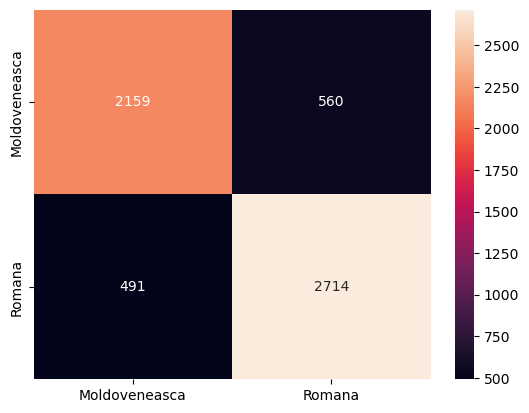

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
classifier = DecisionTreeClassifier(max_depth=None)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')

print("F1 Score:", f1)

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=label_to_dialect, yticklabels=label_to_dialect)

Accuracy: 0.8971978392977717
F1 Score: 0.8953124581510673


<Axes: >

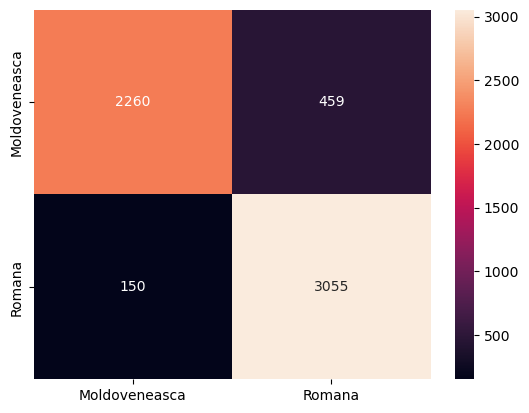

In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=500, n_jobs = -1)  # You can adjust the number of trees

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')

print("F1 Score:", f1)

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=label_to_dialect, yticklabels=label_to_dialect)

Accuracy: 0.9301147873058744
F1 Score: 0.9291536497135162


<Axes: >

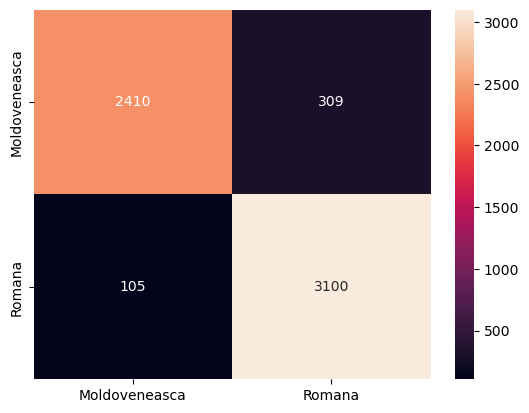

In [15]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')

print("F1 Score:", f1)

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=label_to_dialect, yticklabels=label_to_dialect)

Accuracy: 0.7108372721134368
F1 Score: 0.7016600245985103


<Axes: >

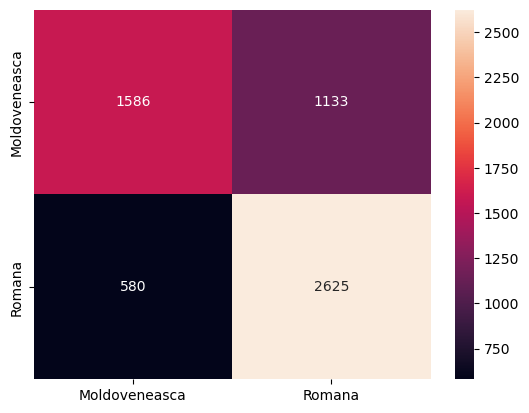

In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')

print("F1 Score:", f1)

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=label_to_dialect, yticklabels=label_to_dialect)

Accuracy: 0.9054692775151925
F1 Score: 0.9041691880182829


<Axes: >

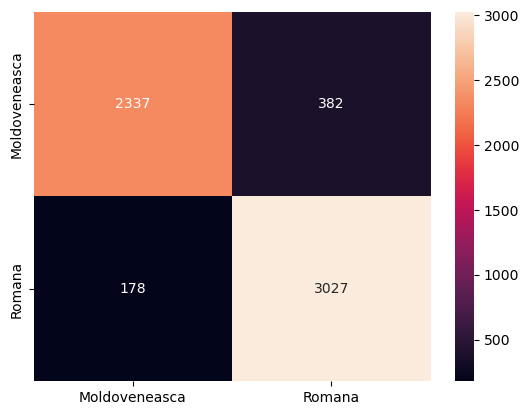

In [18]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=100, n_jobs=-1)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')

print("F1 Score:", f1)

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=label_to_dialect, yticklabels=label_to_dialect)

Accuracy: 0.8759284267386901
F1 Score: 0.8744399543096091


<Axes: >

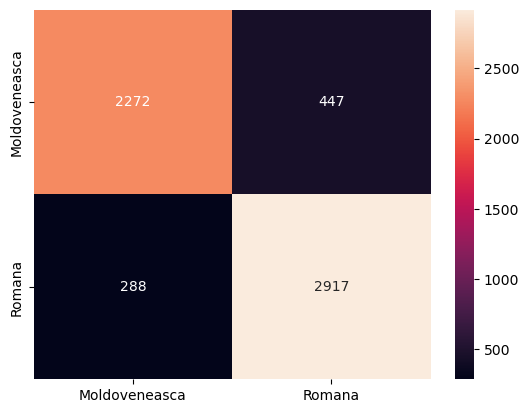

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')

print("F1 Score:", f1)

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=label_to_dialect, yticklabels=label_to_dialect)